In [9]:
#Taller 1 - David Báez y Andrés Ramirez 

#Librerias que se utilizarán para el desarrollo del taller 
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sbn
from matplotlib import pyplot as plt
from numpy.ma.core import sqrt
import warnings
warnings.filterwarnings("ignore")

In [127]:
 !pip install --quiet pandas_datareader
 import pandas_datareader.data as pdr

In [128]:
!pip install --quiet yfinance
import yfinance as yf

In [ ]:
#1) Las acciones que tomaremos para el desarrollo del taller serán Tesla y Google.

# Para ello creamos el vector de activos y posteriormente procedemos a descargar la información solicitada.

In [ ]:
#Hola profe, intenté por todos los medios instalar las librerias para traer el histórico de los datos y realizar el punto normal pero no me dejó, por lo que realicé el ejercicio como normalmente lo hemos realizado. Pido disculpas de antemano y dejo el código de como intenté hacer todo. 

#from pandas_datareader import yf.pdr_override()
#start_date = "2021-01-01"
#end_date = "2022-12-31"
#tickers= ['TSLA', 'GOOG']
#data = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
#data= pdr.get_data_yahoo(tickers,start="2021-01-01",end="2022-12-31",interval='d').dropna()
#print(data)

In [25]:
#Punto 1
#1) Las acciones que tomaremos para el desarrollo del taller serán Tesla y Google.

# Para ello creamos el vector de activos y posteriormente procedemos a descargar la información solicitada.
activos = ['TSLA', 'GOOG']
precios_d = yf.download(activos,start="2021-01-01",end="2022-12-31",interval='1d').dropna()
precios_m = yf.download(activos,start="2021-01-01",end="2022-12-31",interval='1Mo').dropna()
precios_adj = precios_d.loc[:,"Adj Close"]
precios_adj_m = precios_m.loc[:,"Adj Close"]
precios_adj


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


,GOOG,TSLA
Date,,
2021-01-04,86.412003,243.256668
2021-01-05,87.045998,245.036667
2021-01-06,86.764503,251.993332
2021-01-07,89.362503,272.013336
2021-01-08,90.360497,293.339996
...,...,...
2022-12-23,89.809998,123.150002
2022-12-27,87.930000,109.099998
2022-12-28,86.459999,112.709999


Introducción 

Para el desarrollo de este taller tomaremos como referencia los precios de las acciones de ***Tesla ('TSLA')*** y de ***Google ('GOOG')***, trayendo el histórico de sus precios a partir de la periodicidad establecida en el enunciado del taller, que empieza en enero del año 2021 y termina en diciembre del año 2022. Es importante establecer que la periodicidad del histórico se trae en dos momentos, tanto díaria como mensual, para posteriormente utilizar y facilitar el desarrollo de ciertos incisos del primer punto. De igual forma, luego de traer el histórico de precios, se procede a tomar el precio ajustado, teniendo en cuenta que este último puede considerarse como el 'precio real', ya que cuenta con todos los ajustes que se realizan después del cierre, al igual que cuenta con los dividendos(en caso de que existan en la empresa). 

In [123]:
from numpy.core.fromnumeric import mean
#1.A) Cálculo de retornos díarios, mensuales y anual logaritmicos. 
ret_d=np.log(precios_adj/precios_adj.shift()).dropna()
ret_m=np.log(precios_adj_m/precios_adj_m.shift()).dropna()
ret_a=mean(ret_d)*252
retm=mean(ret_m)
retd=mean(ret_d)

datos= {"Retorno Log Díario":retd, "Retorno Log Mensual":retm, "Retorno Log Anual":ret_a}
ta= pd.DataFrame(datos)
ta

,Retorno Log Díario,Retorno Log Mensual,Retorno Log Anual
GOOG,0.000053,-0.001473,0.013288
TSLA,-0.001356,-0.033227,-0.341591


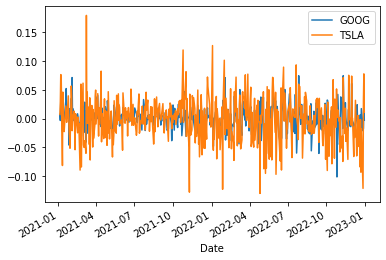

In [131]:
ret_d.plot();


Interpretación

Para la interpretación de este punto es importante mencionar que el cálculo de los retornos logaritmicos permiten establecer una visión más precisa del comportamiento de los dos activos, para el periodo de tiempo seleccionado. Esto último, dada su característica de ser compuestos o continuos. Este concepto permite observar la variación porcentual del valor del precio de la acción entre ayer y hoy, por decirlo en palabras más laxas, lo cual permite analizar la posición en la que se han encontrado los inversionistas respecto a sus ganancias o pérdidas, con los activos financieros en cuestión. Para este caso particular, es imperativo rememorar que los retornos logaritmicos constituyen la acumulación de todas las variaciones de los retornos del activo en el tiempo. 

**TSLA**: Analizando los tres tipos de retornos que arroja la acción se puede denotar que este activo ha tenido una tendencia negativa, teniendo en cuenta la alta variación de precios por la que ha pasado las acciones de esta compañia a raíz del sin fin de coyunturas que se han generado por los diferentes accionares de su fundador Elon Musk. Realizando una revisión a la gráfica, se puede observar que la variación díaria del activo se encuentra entre 15% Y -17%, lo cual sustenta la alta volatilidad que ha presentado en el mercado. De igual forma, este tipo de comportamientos muestran que la acción de la empresa no ha tenido pérdidas o ganancias óptimas, puesto que hay una gran parte de los retornos por debajo de 0. 

**GOOG**: A diferencia de Tesla, al revisar el retorno de las acciones de google se puede denotar una tendencia positiva, que cuenta con una variación díaria de alrededor de 7% y -8%, lo cual demuestra que un crecimiento del valor del precio de la acción en el periodo de tiempo establecido, a raíz de ganancias significativas y de la poca cantidad de retornos que se encuentran por debajo de 0. 


In [37]:
#Cáculo de Retornos esperados y Volatilidades Anualizadas

#Valor esperado(la media de los retornos), la volatilidad anualizada(la desviacion estandar) para todos los activos 
#Cálculo para Tesla 
mean,sigma=ret_m["TSLA"].mean(),ret_m["TSLA"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)



-0.03322749530218915 0.1732709192137775


(-0.3987299436262698, 0.60022807110485)

In [38]:
#Cálculo para Google
mean,sigma=ret_m["GOOG"].mean(),ret_m["GOOG"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

-0.001472722375922391 0.08539758016602027


(-0.01767266851106869, 0.2958258953819667)

In [44]:
Retornos_esperados= {"Retornos esperados":ret_m.mean(),"Volatilidades Anualizadas":ret_m.std()*np.sqrt(12)}
df_re= pd.DataFrame(Retornos_esperados)
df_re

,Retornos esperados,Volatilidades Anualizadas
GOOG,-0.001473,0.295826
TSLA,-0.033227,0.600228


Interpretación 

Para este punto se realizó el cálculo de los retornos esperados mensuales, junto con la volatilidad anualizada del precio de las acciones para los activos en cuestión.  Respecto a las dos acciones, se puede concluir que la mejor es Google, dada la relación riesgo/retorno que ofrece. En efecto, esta acción es la que ofrece una mayor rentabilidad al ser de -0.14% y la que tiene el menor nivel de riesgo con 29.6%, es decir, se logra un mayor nivel de rentabilidad con un menor riesgo. Ya que, por otra parte, la acción de Tesla ofrece una resntabilidad de -3.3% con un nivel de riesgo del 60%, que se puede entrever es muy alto. 


In [45]:
#Tabla resumen con las estadísticas descriptivas 

#Estadisticas Descriptivas con los retornos díarios para los dos activos

stats= {"Media":ret_d.mean(), "Mediana":ret_d.median(), "Desviación":ret_d.std(), 
        "Curtosis": ret_d.kurt(), "Simetría": ret_d.skew()}
df1 = pd.DataFrame(stats)
df1

,Media,Mediana,Desviación,Curtosis,Simetría
GOOG,0.000053,0.000720,0.020306,2.244691,-0.030774
TSLA,-0.001356,0.000932,0.038495,1.538930,-0.027959


Interpretación 

Con respecto a las medidas descriptivas de los retornos para cada acción, podemos encontrar que el retorno promedio de resultados para la acción de GOOG se centra entre en 0.000053 con un valor medio de 0.00072, por otra parte, la acción de TSLA cuenta con un retorno promedio de -0.0013, lo cual es inferior al de GOOG, y respecto a su valor medio este se encuentra en 0.000932, que se distancia en 0.0002 de GOOG. Con esto, se puede volver a ratificar que el retorno promedio de la acción de Google es mayor a la de Tesla. En lo referente a la desviación estándar, esta nos muestra que tan dispersos están los retornos de las acciones con respecto a la media, por lo que se puede observar que la acción de Tesla cuenta con datos más dispersos, que los de Google, teniendo en cuenta que la desviación de la primera supera por 0.018 puntos a la otra. Ahora bien, respecto a la curtosis para las dos acciones se pueden observar niveles de curtosis Platicúrtica (<3) con poca concentración de datos en la media Y con altos niveles de dispersión entre los datos. Entre las dos, la acción que más se acerca a ser Mesocúrtica es la de Google, teniendo en cuenta que el valor de este componente es cercano a 3, que es lo que establecido para caracterizarse del tipo anteriormente mencionado. Respecto a la simetria de los datos, estos se encuentran concentrados a hacia la izquierda de la zona central de la distribución presentada. 

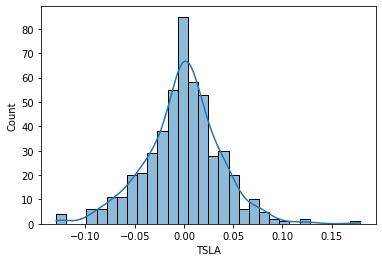

In [49]:
#1.D
sbn.histplot(data=ret_d, x="TSLA", kde=True)


Interpretación 

1. Para la acción de Tesla podemos resaltar que el pico de los datos de los retornos se encuentran cercanos al punto 0.00, por ambas partes de la gráfica, de ahí que se puede observar la cantidad de datos que se encuentran por debajo de 0, lo cual se ve reflejado en los retornos que ofrece la acción.

2. Los datos mantienen una distribución y concentración central cercana a la mediana, establecida en el punto anterior. 

3. En lo referente a la simetría se puede observar que los datos tienden a ser simétricos, mas no alcanza esta característica en su totalidad por lo que se podrían catalogar como parcialmente asimétricos. En la gráfica se puede observar su concentración hacia el lado izquierdo de la gráfica, lo que indica y ratifica que existe una gran cantidad de retornos por debajo de 0. De igual forma, es importante resaltar la presencia de datos atípicos. 

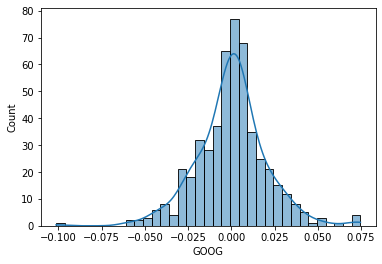

In [50]:
sbn.histplot(data=ret_d, x="GOOG", kde=True)

Interpretación 

1. Para la acción de Google podemos resaltar que el pico de los datos de los retornos se encuentran cercanos al punto 0.00, por ambas partes de la gráfica. 

2. Los datos mantienen una distribución y concentración central cercana a la mediana, establecida en el punto anterior. 

3. En lo referente a la simetría se puede observar que los datos tienden a ser simétricos, esto se puede observar ya que están bien concentrados, mas no son completamente simétricos, porque al igual que Tesla, existe una mayor concentración de datos por debajo de 0. En ese sentido, para este caso los datos presentados si son retornos asimétricos con tendencia hacia la izquierda. Al igual que con Tesla se puede evidenciar la presencia de datos atípicos en los extremos de las gráficas. 

- En otro orden de ideas, gráficamente se puede entrever que las distribuciones son normales, a pesar de que posteriormente en las pruebas no se ratifique esto. 

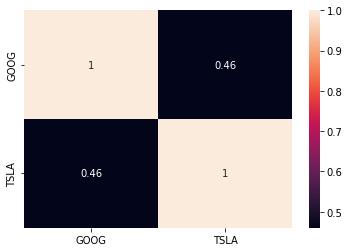

In [52]:
#Cálculo de correlaciones de Pearson, Rango de Kendall y de Spearman

#Correlación de Pearson 
matriz_correlacion=ret_d.corr().round(2)
sbn.heatmap(data=matriz_correlacion,annot=True,annot_kws={"size": 10});

***Correlación de Pearson.***

La correlación de Pearson nos mostrará el nivel de relación existente entre las variables a consideración, que en este caso son Tesla y Google. A priori, se puede establecer que en todas las correlaciones que se presentarán a continuación mostrarán un grado de relación relativamente bajo, teniendo en cuenta que Tesla es una compañia dedicada a la comercialización de vehículos, junto con la producción y distribución de componentes de baterias. Mientras que, Google es una empresa dedicada a una rama completamente diferente, cuyo énfasis está dado al sector del internet, en el desarrollo de comunicación y programas. Para la métrica de esta correlación, sus parámetros indican que si está por debajo de 0, su relación es negativa, si es mayor a 0 es que existe relación de algún tipo, igual a 1 es relación lineal perfecta. Entre más cercano a 0, menor la relación y a 1, es mayor. En ese sentido, al observar la gráfica, que las variables cuentan con un grado de relación positiva con un nivel de asosiación bajo, teniendo en cuenta que es inferior a 0.5, pero mayor a 0. 

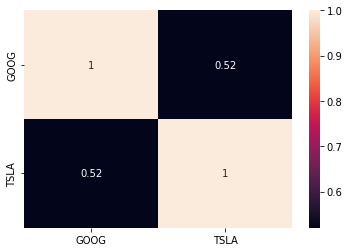

In [53]:
#Correlacion de Spearman
matriz_correlacion_2=ret_d.corr(method="spearman").round(2)
sbn.heatmap(data=matriz_correlacion_2,annot=True,annot_kws={"size": 10});

***Correlación de Spearman***

La correlacion de Spearman relaciona el rango de dos variables, es decir, la diferencia entre su máximo y mínimo valor de los retornos (en este caso). Por lo que se puede observar que efectivamente el rango de los retornos díarios de estos activos cuentan con una relación positiva, mas no muy alta. 

In [57]:
#Rango de Kendall 
import scipy.stats as stats
matriz_correlacion_3= stats.kendalltau(ret_d['GOOG'], ret_d['TSLA'])
matriz_correlacion_3

KendalltauResult(correlation=0.36568297667612987, pvalue=1.7393728467773816e-34)

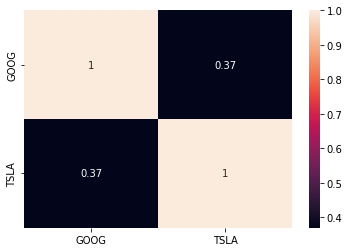

In [64]:
matriz_correlacion_4=ret_d.corr(method="kendall").round(2)
sbn.heatmap(data=matriz_correlacion_4,annot=True,annot_kws={"size": 10});

***Rango de Kendall***

El rango de Kendall es un tipo de medida no paramétrica que se utiliza para medir el nivel de relación entre dos columnas de datos dados, que parte de cuantificar la cantidad de datos concordantes y no concordantes, en aras, de calcular si existe o no una relación. En este caso, como se puede observar la correlación está dada por 0.37, por lo que al estar tan cercano al 0 se puede establecer que existe una relación bastante debil entre ambas columnas de datos. 

In [65]:
# Prueba de Kolmogorov-Smirnov
tsla=stats.kstest(ret_d["TSLA"],'norm')
goog=stats.kstest(ret_d["GOOG"],'norm')

In [66]:
stats2={"TSLA":tsla,"GOOG":goog}
df2=pd.DataFrame(stats2, index=["Estadistico","Valor P"])
df2

,TSLA,GOOG
Estadistico,4.551877e-01,4.739149e-01
Valor P,1.453144e-95,4.864949e-104


***Prueba de Kolmogorov-Smirnov***

Esta prueba tiene por objetivo analizar si los datos obtenidos de la muestra siguen distribución normal o no, en ese sentido si el P-Value es menor a 0.05, se concluye que los datos no siguen una distribución normal, como sucede en ambos casos analizados, tanto para Tesla, como para Google. 

In [71]:
#Punto 2 
activos_2 = ['MSFT','AAPL','DBX','KO','AMZN','NFLX','DIS','HD','VZ','INTC']
precios_2 = yf.download(activos_2,start="2017-12-31",end="2022-12-31",interval='1Mo').dropna()
precios_adj_2 = precios_2.loc[:,"Adj Close"]

[*********************100%***********************]  10 of 10 completed


In [73]:
#Retornos logaritmicos de los nuevos activos 
ret=np.log(precios_adj_2/precios_adj_2.shift()).dropna()

In [74]:
#Valor esperado(la media de los retornos) anualizado, la volatilidad anualizada(la desviacion estandar) para todos los activos 
#1)
mean,sigma=ret["MSFT"].mean(),ret["MSFT"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

0.017804997290641698 0.06217825444440779


(0.2136599674877004, 0.21539179164731928)

In [75]:
#2)
mean,sigma=ret["AAPL"].mean(),ret["AAPL"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

0.021286572654958296 0.09447112250123718


(0.25543887185949954, 0.3272575680404124)

In [76]:
#3)
mean,sigma=ret["DBX"].mean(),ret["DBX"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

-0.0052980303103544344 0.09382133957232279


(-0.06357636372425321, 0.32500665394687106)

In [77]:
#4)
mean,sigma=ret["KO"].mean(),ret["KO"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

0.009588401118210854 0.057224607088294376


(0.11506081341853025, 0.19823185384018394)

In [78]:
#5)
mean,sigma=ret["AMZN"].mean(),ret["AMZN"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

0.0012533239848890082 0.0961162039600223


(0.015039887818668099, 0.33295629737882304)

In [79]:
#6)
mean,sigma=ret['NFLX'].mean(),ret["NFLX"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

-0.001034070056363402 0.13778713750397492


(-0.012408840676360824, 0.4773086455727274)

In [80]:
#7)
mean,sigma=ret["HD"].mean(),ret["HD"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

0.011578546930438494 0.0716201674265595


(0.13894256316526193, 0.24809953765878112)

In [81]:
#8)
mean,sigma=ret["DIS"].mean(),ret["DIS"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

-0.0020724425966001875 0.09568584162498447


(-0.02486931115920225, 0.3314654785189241)

In [82]:
#9)
mean,sigma=ret["VZ"].mean(),ret["VZ"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

-0.0001470600538274603 0.04863147272709082


(-0.0017647206459295236, 0.16846436322044298)

In [83]:
#10)
mean,sigma=ret["INTC"].mean(),ret["INTC"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

-0.009599876456241276 0.0849965584147903


(-0.11519851747489532, 0.29443671528582555)

In [87]:
Retornos_esperados_2= {"Retornos esperados":ret.mean()*12,"Volatilidades Anualizadas":ret.std()*np.sqrt(12)}
df_re_2= pd.DataFrame(Retornos_esperados_2)
df_re_2.sort_values(by=['Retornos esperados'],ascending=False)

,Retornos esperados,Volatilidades Anualizadas
AAPL,0.255439,0.327258
MSFT,0.213660,0.215392
HD,0.138943,0.248100
KO,0.115061,0.198232
AMZN,0.015040,0.332956
VZ,-0.001765,0.168464
NFLX,-0.012409,0.477309
DIS,-0.024869,0.331465
DBX,-0.063576,0.325007
INTC,-0.115199,0.294437


Interpretación 

Antes de iniciar con la interpretación, es importante resaltar que el proceso de obtención de los retornos, precios y volatilidades que se realizó, es el mismo del anterior punto. De ahí que, con base en los resultados presentados se puede observar que la acción que presenta mejor retorno anual, es la acción de Apple, no obstante, se puede observar que esta presenta un riesgo considerablemente mayor (del 32%), con respecto con el activo que quedó en segunda posición, Microsoft, que cuenta con un riesgo de 21%, retornando 4 puntos menos por debajo de Apple. Lo anterior, permite concluir que la acción que cuenta con una mejor relación riesgo/retorno es Microsoft, puesto que ofrece 4 puntos menos de rentabilidad, pero con 11% menos de riesgo en referencia a la acción que más genera de las 10 en cuestión. También, cabe mencionar que estos resultados son completamente coherentes dada las trayectorias de estas dos compañías desde la fecha de inicio (2007) planteada por el enunciado, ya que al ser empresas dedicadas al sector tecnológico, el desarrollo que han tenido a través de los años les ha permitido incrementar considerablemente el precio de la acción, especialmente Apple con la gran valorización que ha tenido recientemente a raíz de sus estretaegías financieras. Por otra parte, es curioso revisar el retorno y la volatilidad asociada a al tiempo de una compañia, teniendo en cuenta el caso de Coca Cola, que a pesar de ser una compañía de tantos años no cuenta con un retorno excesivamente alto, debido que su sector del mercado limita un poco su innovación ya que cuentan con un producto que lleva consolidado en el mercado una gran cantidad de años. 

In [90]:
#Punto 3

#Serie de precios desde Diciembre del 2011 a Diciembre de 2022
activos = ['^RUT']
precios_i = yf.download(activos,start="2011-12-31",end="2022-12-31",interval='1Mo').dropna()
precios_adj_i = precios_i.loc[:,"Adj Close"]
precios_adj_i


[*********************100%***********************]  1 of 1 completed


Date
2012-01-01     792.820007
2012-02-01     810.940002
2012-03-01     830.299988
2012-04-01     816.880005
2012-05-01     761.820007
                 ...     
2022-08-01    1844.119995
2022-09-01    1664.719971
2022-10-01    1846.859985
2022-11-01    1886.579956
2022-12-01    1761.250000
Name: Adj Close, Length: 132, dtype: float64

In [91]:
#Cálculo de los retornos del índice 
ret_i=np.log(precios_adj_i/precios_adj_i.shift()).dropna()
ret_i

Date
2012-02-01    0.022598
2012-03-01    0.023593
2012-04-01   -0.016295
2012-05-01   -0.069782
2012-06-01    0.047012
                ...   
2022-08-01   -0.022048
2022-09-01   -0.102345
2022-10-01    0.103830
2022-11-01    0.021279
2022-12-01   -0.068742
Name: Adj Close, Length: 131, dtype: float64

In [92]:
#Volatilidad mensual y anualizada con Desviacion Estandar 
sigma_m = ret_i.std()
mean_m=ret_i.mean()
sigma_m

0.054690663898147106

In [93]:
sigma_a=sigma_m*np.sqrt(12)
sigma_a

0.18945401714252746

In [94]:
mean_m

0.00609299881094452

In [95]:
mean_a=mean_m*np.sqrt(12)
mean_a

0.02110676702202533

Interpretación

***Desviación Estándar***:La volatilidad constituye la desviación de la acción en un periodo de tiempo, en este caso, la variación mensual del compilado de acciones que componen el índice. Con lo anterior, se puede concluir que el índice Rusell cuenta con una desviación mensual del 54%, lo cual es bastante si no se tiene en consideración que este índice tiene en su composición 2000 acciones por lo que es completamente normal que sea tan volatil. En cuanto a su variación anual, es de 19%.

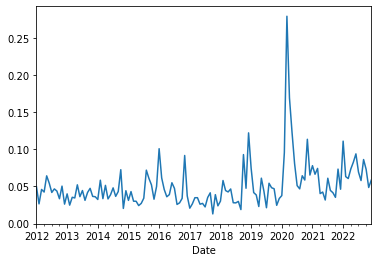

In [110]:
#Volatidilad modelo de Parkinson 
lnHLL = np.log(precios_i["High"]/precios_i["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHLL**2)**0.5
sigmaPark_d.plot();

In [125]:
#Volatidilad mensual modelo de Parkinson 
sigmaPark_m=sigmaPark_d.mean()
sigmaPark_m

0.05110282355923833

In [111]:
#Volatidilad anual modelo de Parkinson 
sigmaPark=sigmaPark_d.mean()*np.sqrt(12)
sigmaPark

0.17702537362965717

Interpretación 

***Modelo de Parkinson***: El modelo de volatilidad parkinson, solo tiene en cuenta los precios maximos y minimos de los activos en cuestión, para el periodo de tiempo establecido, en este caso anual y mensual. Con esto presente, los resultados muestran una volatilidad mensual de 51% y anual de 17,7%, que nuevamente se puede denominar que es alta teniendo en cuenta las caracteristicas de las acciones que componen el índice. 

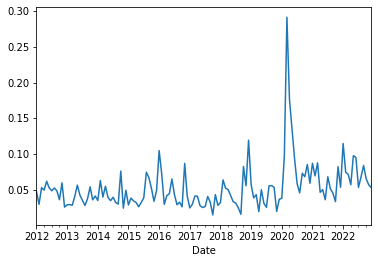

In [112]:
#Volatilidad en Garman-Klass
lnHL = np.log(precios_i["High"]/precios_i["Low"]).dropna()
lnCO = np.log(precios_i["Close"]/precios_i["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot();

In [126]:
sigmaGK_m=sigmaGK_d.mean()
sigmaGK_m

0.05244964972327022

In [113]:
#Volatilidad anual en Garman-Klass
sigmaGK=sigmaGK_d.mean()*np.sqrt(12)
sigmaGK

0.18169091631978984

***Volatilidad de Garman-Klass***
A diferencia del modelo de Parkinson, el modelo de volatilidad de Graman Klass tiene en cuenta los precios de apertura y cierre de la accion, por lo que podria considerarse mas eficiente, ya que no limita componentes de las acciones para realizar un cálculo de su variación. En ese sentido, este cálculo arroja unos valores similares a los anteriores, en donde la volatilidad mensual es de 52% y la anual de 18%. 

In [116]:
#Volatilidad EWMA
def EWMAvol(ret,Lambda):
  m = len(ret) 
  b = np.arange(m-1,-1,-1) # secuencia decreciente
  l = np.repeat(Lambda,m)

  varewma = ((np.power(ret,2)*(np.power(l,b))).sum())*(1-Lambda)
  EWMAvol = np.sqrt(varewma)
  return(EWMAvol)
Lambda = 0.94

In [118]:
sigmaEWMA=EWMAvol(ret_i,0.94)*np.sqrt(12)

In [120]:
resultado= [sigmaEWMA]
ewmastats={"EWMA":resultado}
ewma=pd.DataFrame(ewmastats, index=['^RUT'])
ewma

,EWMA
^RUT,0.236623


**Volatilidad Ponderada Exponencial **
Tiene por objetivo calcular la volatilidad del periodo siguiente en el cual se está calculando, es decir, si se realizó un cálculo díario, con este modelo se realiza un pronóstico del día de mañana. En ese sentido, como el cálculo se realizó de manera anual, se interpreta que el pronóstico de la volatilidad del índice para el siguiente año sea del 23,6%

***Referencias ***

1.  Curtosis -  Economipedia: https://economipedia.com/definiciones/curtosis.html

2.   Coeficiente de Correlación de Pearson: https://www.cimec.es/coeficiente-correlacion-pearson/

3. Coeficiente de Correlación de Spearman: https://www.questionpro.com/blog/es/coeficiente-de-correlacion-de-spearman/

4. TAU de Kendall: https://statologos.com/kendalls-tau-2/ 

5. Prueba de Kolmogórov-Smirnov: https://psicologiaymente.com/miscelanea/prueba-kolmogorov-smirnov 

6. Retornos Logaritmicos: https://es.coursera.org/lecture/algoritmos-de-negociacion-basados-en-machine-learning/retornos-logaritmicos-6yFpx


